# Assignment 4. Beer Clustering

## Data: 20 beers
- attributes: calories, sodium, alcohol, cost

In [5]:
# beer dataset
import pandas as pd

beer = pd.read_csv('beer.txt', sep=' ') # this file separated by ' ', not comma
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


We will cluster 20 beers with 4 attributes.

In [6]:
# define X
X = beer.drop('name', axis=1)
names = beer.name

Normalize feature scales to prevent a large-scale feature dominates the clustering results!

In [7]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

We first define a function to visualize dendrogram.

In [8]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(model, figsize=(10, 5), **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=figsize)
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    if 'labels' not in kwargs:
        xlabel = "Number of points in node (or index of point if no parenthesis)."
    else:
        xlabel = "Data Sample"
    ylabel = "Distance"
    if 'orientation' in kwargs and kwargs['orientation'] == 'right':
        plt.xlabel(ylabel)
        plt.ylabel(xlabel)
    else:
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

## Problem 1. Dendrogram

Draw hierarchical clustering dendrogram with complete linkage option (use euclidean distance as we did in the lab!).

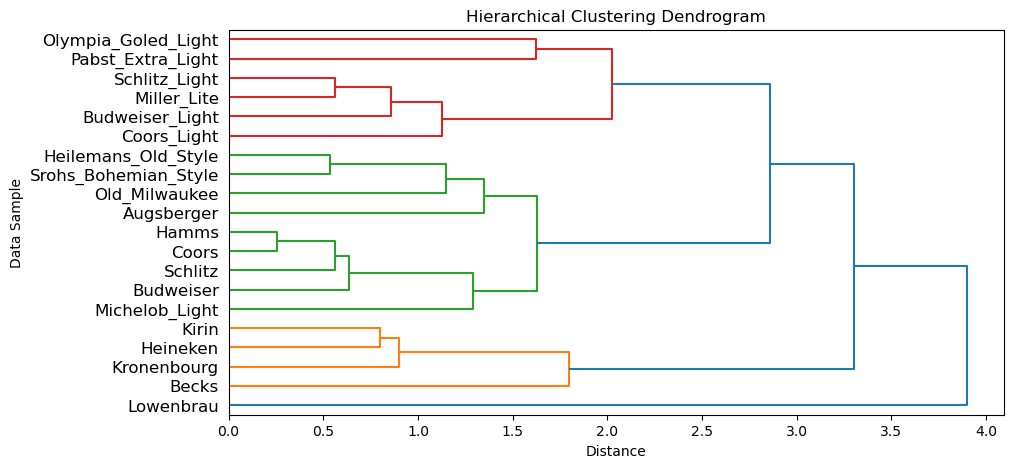

In [12]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='average')
model.fit(X_scaled)
plot_dendrogram(model, labels=names.tolist(), orientation='right')

## Problem 2. The number of clusters

Based on the dendrogram in Problem 1, what is the appropriate number of clusters?

In [14]:
model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
model.fit(X_scaled)

AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

## Problem 3. The smallest cluster

Based on the result from problem 2, find the smallest cluster and list all beer names in the cluster.

In [16]:
beer['cluster_hierarchical'] = model.labels_ # hierarchical clustering label results
beer.sort_values('cluster_hierarchical')

,name,calories,sodium,alcohol,cost,cluster_hierarchical
9,Budweiser_Light,113,8,3.7,0.40,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
11,Coors_Light,102,15,4.1,0.46,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
8,Miller_Lite,99,10,4.3,0.43,0
19,Schlitz_Light,97,7,4.2,0.47,0
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
12,Michelob_Light,135,11,4.2,0.50,1


Cluster 3 is the smallest and "Lowenbrau" is the only beer in this cluster